In [0]:
# Apr 25, 2020
# increse data by adding videos from youtube
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras import models
from keras import layers
from keras import metrics
from keras import optimizers

import numpy as np
import json
import os
import csv
import pandas as pd
import tensorflow_addons as tfa


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read json 2-d pose as data, without using: 
#     {15, "REye"},
#     {16, "LEye"},
#     {17, "REar"},
#     {18, "LEar"}

ur_basepath1 = '/content/drive/My Drive/636project/data/fall_UR/fall-cam0'
ur_basepath2 = '/content/drive/My Drive/636project/data/adl_UR'
mc_fall_path = '/content/drive/My Drive/636project/data/MCdataset/mc_fall'
mc_notfall_path = '/content/drive/My Drive/636project/data/MCdataset/mc-notfall'
youtube_fall_path = '/content/drive/My Drive/636project/data/Youtube/y_fall'
youtube_notfall_path = '/content/drive/My Drive/636project/data/Youtube/y_notfall'

def input_data(basepath):
  data = []
  entries = os.listdir(basepath)
  for entry in entries:
    path = os.path.join(basepath, entry)
    frames = os.listdir(path)
    for frame in frames:
      frame_path = os.path.join(path, frame)
      with open(frame_path, mode='r') as json_file:
        people_dict = json.load(json_file)
        people = people_dict["people"]
        pose_keypoints_2d = []
        # fill missing data as 0
        if len(people) == 0:
          pose_keypoints_2d = [0] * 63
        else:
          full_pose = people[0].get("pose_keypoints_2d")
          pose_keypoints_2d = full_pose[:45] + full_pose[57:]
         
        pose_keypoints_2d.append(frame.split('.')[0])
        # each pose_keypoints_2d: 
        #    [431.949, 196.241, 0.0564434, 437.194, 187.749, 0.552267,...'fall-06-cam0_000000000065_keypoints']
        # OR [123.949, 283.241, 0.0564434, 437.194, 187.749, 0.552267,...'43_000000000000_keypoints']
        data.append(pose_keypoints_2d)        
  return data

In [0]:
# read the data of UR dataset  
# http://fenix.univ.rzeszow.pl/~mkepski/ds/uf.html
ur_data1 = input_data(ur_basepath1)
print(len(ur_data1))

ur_data2 = input_data(ur_basepath2)
print(len(ur_data2))
 
ur_data = ur_data1 + ur_data2
print("finish UR dataset, and the length of UR dataset: ", len(ur_data))

df1 = pd.DataFrame.from_records(ur_data)
df1.to_csv (r'/content/drive/My Drive/636project/ur_data.csv', index = False, header=False)

# read the data of MC dataset
# http://www.iro.umontreal.ca/~labimage/Dataset/
mc_fall_data = input_data(mc_fall_path)
print("finish mc fall data. the length of mc-fall dataset: ", len(mc_fall_data))


df2 = pd.DataFrame.from_records(mc_fall_data)
df2.to_csv(r'/content/drive/My Drive/636project/mc_fall_data.csv', index = False, header=False)

mc_notfall_data = input_data(mc_notfall_path)
print("length of mc_not_fall dataset: ", len(mc_notfall_data))

df3 = pd.DataFrame.from_records(mc_notfall_data)
df3.to_csv(r'/content/drive/My Drive/636project/mc_notfall_data.csv', index = False, header=False)


In [0]:
# read the data of youtube dataset
youtube_fall_data = input_data(youtube_fall_path)
print("length of youtube_fall dataset: ", len(youtube_fall_data))

df4 = pd.DataFrame.from_records(youtube_fall_data)
df4.to_csv(r'/content/drive/My Drive/636project/youtube_fall_data.csv', index = False, header=False)

youtube_notfall_data = input_data(youtube_notfall_path)
print("length of youtube_notfall dataset: ", len(youtube_notfall_data))

df5 = pd.DataFrame.from_records(youtube_notfall_data)
df5.to_csv(r'/content/drive/My Drive/636project/youtube_notfall_data.csv', index = False, header=False)

print('finish loading youtube dataset')

length of youtube_fall dataset:  1756
length of youtube_notfall dataset:  2723
finish loading youtube dataset


In [0]:
# read the video data csv,
# it is faster than running the above code each time

ur_path = '/content/drive/My Drive/636project/ur_data.csv'
mc_fall_path = '/content/drive/My Drive/636project/mc_fall_data.csv'
mc_notfall_path = '/content/drive/My Drive/636project/mc_notfall_data.csv'
youtube_fall_path = '/content/drive/My Drive/636project/youtube_fall_data.csv'
youtube_notfall_path = '/content/drive/My Drive/636project/youtube_notfall_data.csv'

def read_data(path):
  video_data = []
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      video_data.append(row)
  return video_data

ur_data = read_data(ur_path)
mc_fall_data = read_data(mc_fall_path)
mc_notfall_data = read_data(mc_notfall_path)
youtube_fall_data = read_data(youtube_fall_path)
youtube_notfall_data = read_data(youtube_notfall_path)


print(ur_data[0])
print(mc_fall_data[0])
print(mc_notfall_data[0])
print(youtube_fall_data[0])
print(youtube_notfall_data[0])

['520.972', '128.178', '0.833728', '544.571', '130.782', '0.739747', '540.636', '132.754', '0.726633', '553.086', '154.999', '0.800764', '541.285', '166.155', '0.742877', '549.144', '129.467', '0.745059', '572.703', '155.035', '0.841464', '543.266', '171.369', '0.817947', '572.067', '169.415', '0.607432', '564.874', '166.16', '0.534525', '526.875', '181.191', '0.862423', '554.389', '217.851', '0.612664', '577.962', '170.732', '0.619415', '535.402', '188.398', '0.760066', '560.284', '220.479', '0.65847', '545.882', '232.266', '0.604373', '553.078', '232.915', '0.532739', '566.184', '222.453', '0.655722', '541.939', '229.002', '0.399536', '541.943', '227.687', '0.344383', '560.285', '217.223', '0.153482', 'fall-16-cam0_000000000016_keypoints']
['504.171', '238.019', '0.119379', '481.995', '237.979', '0.647555', '471.564', '247.106', '0.6547', '485.918', '299.334', '0.780827', '525.04', '307.158', '0.770417', '495.036', '228.845', '0.474206', '519.863', '220.995', '0.283234', '539.41', '2

In [0]:
# read target label of UR dataset. 

target = []
path1 = '/content/drive/My Drive/636project/target/urfall-cam0-falls.csv'
path2 = '/content/drive/My Drive/636project/target/urfall-cam0-adls.csv'
# in these csv of UR dataset, 
# '-1' means person is not lying, '1' means person is lying on the ground; '0' is temporary pose, when person "is falling"

def input_fall(path):
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      record = []
      record.append(row[0])
      record.append(row[1])
      label = row[2]
      if label == '1' or label == '0':
        record.append(1)        
      else:
        record.append(0)
      # each record: [<video_id>, <frame_id>, label], eg: ['fall-17', '22', 0] 
      target.append(record)

# though laying in the video, but it is not fall, so I mark 0 as label
def input_adl(path):
  with open(path, mode='r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
      record = []
      record.append(row[0])
      record.append(row[1])
      record.append(0)
      target.append(record)

input_fall(path1)
print("falls of UR dataset", len(target))

input_adl(path2)

df = pd.DataFrame.from_records(target)
df.to_csv (r'/content/drive/My Drive/636project/target_data.csv', index = False, header=False)


falls of UR dataset 2995


In [0]:
# make dictionary of target of ur dataset
target_csv_path = '/content/drive/My Drive/636project/target_data.csv'
idx = 0
idx_dict = {}

with open(target_csv_path, mode='r') as csv_file:
  reader = csv.reader(csv_file)
  for row in reader:
    # each row: [<video_id>, <frame_id>, label], eg: ['fall-17', '22', 0] 
    idx_dict['.'.join(row[:2])] = idx  # {'fall-17.22' : 112}
    idx += 1

In [0]:
# match body landmark data with label data of ur dataset
bodylandmark = []
label = []
frame_name = []

for landmark in ur_data:
  video_name = landmark[-1].split('_')  # 'fall-01-cam0_000000000004'
  a = video_name[0].split('-')
  video_type = a[0] # 'fall'
  video_id = a[1]   # '01'
  frame_id = str(int(video_name[1])) # '000000000004' become '4'
  try:
    a = '.'.join([video_id, frame_id])
    b = '-'.join([video_type, a])
    label.append(target[idx_dict[b]][-1])
    bl = landmark[:-1]
    # convert string into float
    bl = list(map(float,bl))
    bodylandmark.append(bl)
    frameName = landmark[-1]
    frame_name.append(frameName)
  except:
    continue

print("bodylandmark record sample of ur dataset:" )
print(bodylandmark[0])
print("label of ur dataset: ", len(label))
print("bodylandmark of ur dataset: ", len(bodylandmark))
print(frame_name[0])

bodylandmark record sample of ur dataset:
[520.972, 128.178, 0.833728, 544.571, 130.782, 0.739747, 540.636, 132.754, 0.726633, 553.086, 154.999, 0.800764, 541.285, 166.155, 0.742877, 549.144, 129.467, 0.745059, 572.703, 155.035, 0.841464, 543.266, 171.369, 0.817947, 572.067, 169.415, 0.607432, 564.874, 166.16, 0.534525, 526.875, 181.191, 0.862423, 554.389, 217.851, 0.612664, 577.962, 170.732, 0.619415, 535.402, 188.398, 0.760066, 560.284, 220.479, 0.65847, 545.882, 232.266, 0.604373, 553.078, 232.915, 0.532739, 566.184, 222.453, 0.655722, 541.939, 229.002, 0.399536, 541.943, 227.687, 0.344383, 560.285, 217.223, 0.153482]
label of ur dataset:  11475
bodylandmark of ur dataset:  11475
fall-16-cam0_000000000016_keypoints


In [0]:
# add data of MC dataset to the whole dataset
# For MC dataset, all frames in fall data should be label 1, 
# and all frames in notfall data should be label 0.
for record in mc_fall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(1)
  frameName = record[-1]
  frame_name.append(frameName)

for record in mc_notfall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(0)
  frameName = record[-1]
  frame_name.append(frameName)


In [0]:
# add data of youtube dataset to the whole dataset
# For youtube dataset, all frames in fall data should be label 1, 
# and all frames in notfall data should be label 0.
for record in youtube_fall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(1)
  frameName = record[-1]
  frame_name.append(frameName)

for record in youtube_notfall_data:
  bl = record[:-1]
  bl = list(map(float,bl))
  bodylandmark.append(bl)
  label.append(0)
  frameName = record[-1]
  frame_name.append(frameName)


In [0]:
# normalize data 
for record in bodylandmark:
  for i in range(0, 63, 3):
    record[i] = float(record[i])/ 640
    record[i + 1] = float(record[i + 1]) / 480

print(bodylandmark[0])
print(len(label))
print(len(bodylandmark))

[0.81401875, 0.2670375, 0.833728, 0.8508921875000001, 0.2724625, 0.739747, 0.8447437499999999, 0.2765708333333333, 0.726633, 0.864196875, 0.32291458333333334, 0.800764, 0.8457578124999999, 0.34615625, 0.742877, 0.8580375, 0.2697229166666667, 0.745059, 0.8948484375, 0.32298958333333333, 0.841464, 0.848853125, 0.35701875, 0.817947, 0.8938546875, 0.35294791666666664, 0.607432, 0.882615625, 0.3461666666666667, 0.534525, 0.8232421875, 0.37748125, 0.862423, 0.8662328125000001, 0.45385625, 0.612664, 0.903065625, 0.3556916666666667, 0.619415, 0.8365656250000001, 0.3924958333333333, 0.760066, 0.87544375, 0.45933125, 0.65847, 0.8529406249999999, 0.48388749999999997, 0.604373, 0.864184375, 0.48523958333333334, 0.532739, 0.8846624999999999, 0.46344375, 0.655722, 0.8467796875, 0.4770875, 0.399536, 0.8467859375, 0.4743479166666667, 0.344383, 0.8754453124999999, 0.4525479166666667, 0.153482]
33678
33678


In [0]:
# make bodylandmark and label to be a same data frame
all_data = []

for i in range(len(bodylandmark)):
  all_data.append([label[i]])
  all_data[i] = all_data[i] + bodylandmark[i]

print(all_data[0])
print(len(all_data))
print(len(all_data[0]))

[0, 0.81401875, 0.2670375, 0.833728, 0.8508921875000001, 0.2724625, 0.739747, 0.8447437499999999, 0.2765708333333333, 0.726633, 0.864196875, 0.32291458333333334, 0.800764, 0.8457578124999999, 0.34615625, 0.742877, 0.8580375, 0.2697229166666667, 0.745059, 0.8948484375, 0.32298958333333333, 0.841464, 0.848853125, 0.35701875, 0.817947, 0.8938546875, 0.35294791666666664, 0.607432, 0.882615625, 0.3461666666666667, 0.534525, 0.8232421875, 0.37748125, 0.862423, 0.8662328125000001, 0.45385625, 0.612664, 0.903065625, 0.3556916666666667, 0.619415, 0.8365656250000001, 0.3924958333333333, 0.760066, 0.87544375, 0.45933125, 0.65847, 0.8529406249999999, 0.48388749999999997, 0.604373, 0.864184375, 0.48523958333333334, 0.532739, 0.8846624999999999, 0.46344375, 0.655722, 0.8467796875, 0.4770875, 0.399536, 0.8467859375, 0.4743479166666667, 0.344383, 0.8754453124999999, 0.4525479166666667, 0.153482]
33678
64


In [0]:
# know the majority and minority
fall = label.count(1)
not_fall = label.count(0)
print(fall)
print(not_fall)

13017
20661


In [0]:
# up-sampling to make the data balance
# Separate majority and minority classes
df = pd.DataFrame.from_records(all_data)
header = ['label']
for i in range(63):
  header.append(i)

df.columns = header
df_majority = df[df.label==0]
df_minority = df[df.label==1]
print("before re-sampling, not fall vs fall: ")
print(df['label'].value_counts())

from sklearn.utils import resample
print("begin to re sample...")
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=20661)    # to match majority class
                                  
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("after re-sampling...")
# Display new class counts
df_upsampled.label.value_counts()

before re-sampling, not fall vs fall: 
0    20661
1    13017
Name: label, dtype: int64
begin to re sample...
after re-sampling...


1    20661
0    20661
Name: label, dtype: int64

In [0]:
all_data = df_upsampled.values

print(all_data[0])
print(len(all_data[0]))
print("number of all data:", len(all_data))

[0.         0.81401875 0.2670375  0.833728   0.85089219 0.2724625
 0.739747   0.84474375 0.27657083 0.726633   0.86419687 0.32291458
 0.800764   0.84575781 0.34615625 0.742877   0.8580375  0.26972292
 0.745059   0.89484844 0.32298958 0.841464   0.84885312 0.35701875
 0.817947   0.89385469 0.35294792 0.607432   0.88261563 0.34616667
 0.534525   0.82324219 0.37748125 0.862423   0.86623281 0.45385625
 0.612664   0.90306562 0.35569167 0.619415   0.83656563 0.39249583
 0.760066   0.87544375 0.45933125 0.65847    0.85294062 0.4838875
 0.604373   0.86418438 0.48523958 0.532739   0.8846625  0.46344375
 0.655722   0.84677969 0.4770875  0.399536   0.84678594 0.47434792
 0.344383   0.87544531 0.45254792 0.153482  ]
64
number of all data: 41322


In [0]:
# split data into train and test set
np.random.shuffle(all_data)
split_point = len(all_data) // 9
print("split point:", split_point)
test_data = all_data[:split_point]
train_data = all_data[split_point: ]

print("number of test data:", len(test_data))
print("number of train data:",len(train_data))

print(train_data[0])

split point: 4591
number of test data: 4591
number of train data: 36731
[0.         0.60837656 0.44409167 0.784978   0.61039375 0.46044167
 0.86631    0.57573594 0.44959167 0.851352   0.54523437 0.51223333
 0.93276    0.57989531 0.48494375 0.880379   0.64503438 0.46577292
 0.882      0.6695125  0.53657917 0.827932   0.68174531 0.61543333
 0.850795   0.60226094 0.59639583 0.79738    0.579875   0.59627917
 0.804101   0.59207656 0.69424375 0.726894   0.59410469 0.78125417
 0.204631   0.62660937 0.59902292 0.811327   0.6145125  0.69158125
 0.718544   0.61245    0.77586458 0.188269   0.         0.
 0.         0.         0.         0.         0.61242031 0.77310625
 0.103181   0.60224687 0.81660208 0.0578593  0.59410469 0.82202083
 0.0882166  0.59207813 0.79485417 0.144332  ]


In [0]:
# solution 1: train model using lstm
from tensorflow.keras.layers import LSTM
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from numpy import array
from tensorflow.keras.models import Sequential

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))

x_train = []
y_train = []

for record in train_data:
  x_train.append(record[1:])
  label = int(record[0])
  y_train.append(label) 

def train_lstm_model(x_train, y_train):
  x_train = array(x_train)
  x_train = x_train.reshape((len(x_train), 1, len(x_train[0])))
  print("x_train.shape", x_train.shape)
  print(x_train[0])

  y_train = array(y_train)
  print("y_train.shape", y_train.shape)

  # imrpove log: use batch size 16 and add one more lstm layer

  lstm_model = Sequential()
  lstm_model.add(LSTM(16, 
                input_shape=(1, 63),
                return_sequences=True))
  lstm_model.add(LSTM(16, ))
  lstm_model.add(layers.Dense(1, activation='sigmoid'))
  lstm_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc',
                        metrics.AUC(), 
                        metrics.FalseNegatives(),
                        metrics.Recall(),
                        metrics.Precision(),
                        metrics.FalseNegatives(),
                        metrics.TrueNegatives(),
                        metrics.FalsePositives(),
                        metrics.TruePositives()])
  lstm_history = lstm_model.fit(x_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split=0.2,
                      callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5),
                      callbacks.LearningRateScheduler(scheduler)])
  print("finish training lstm model")
  return lstm_model, lstm_history

lstm_model, lstm_history = train_lstm_model(x_train, y_train)

x_train.shape (36731, 1, 63)
[[0.60837656 0.44409167 0.784978   0.61039375 0.46044167 0.86631
  0.57573594 0.44959167 0.851352   0.54523437 0.51223333 0.93276
  0.57989531 0.48494375 0.880379   0.64503438 0.46577292 0.882
  0.6695125  0.53657917 0.827932   0.68174531 0.61543333 0.850795
  0.60226094 0.59639583 0.79738    0.579875   0.59627917 0.804101
  0.59207656 0.69424375 0.726894   0.59410469 0.78125417 0.204631
  0.62660937 0.59902292 0.811327   0.6145125  0.69158125 0.718544
  0.61245    0.77586458 0.188269   0.         0.         0.
  0.         0.         0.         0.61242031 0.77310625 0.103181
  0.60224687 0.81660208 0.0578593  0.59410469 0.82202083 0.0882166
  0.59207813 0.79485417 0.144332  ]]
y_train.shape (36731,)
Epoch 1/100
1837/1837 [==============================] - 23s 13ms/step - loss: 0.3716 - acc: 0.8316 - auc_4: 0.8498 - false_negatives_7: 1439.7061 - recall_4: 0.7324 - precision_4: 0.7748 - false_negatives_8: 1439.7061 - true_negatives_4: 5820.5015 - false_posi

In [0]:
lstm_model.summary()
lstm_model.save("/content/drive/My Drive/636project/model_improved_lstm.h5")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 16)             5120      
_________________________________________________________________
lstm_5 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 7,249
Trainable params: 7,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
# plotting the results

import matplotlib.pyplot as plt

def plotting_training(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  # Plot training & validation loss values
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label="Training loss")
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('epoch', fontsize=10)
  plt.ylabel('loss', fontsize=10)
  plt.ylim(0.0,0.5)
  plt.legend()
  plt.show()

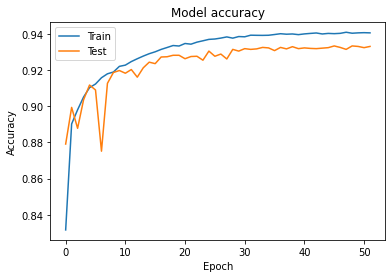

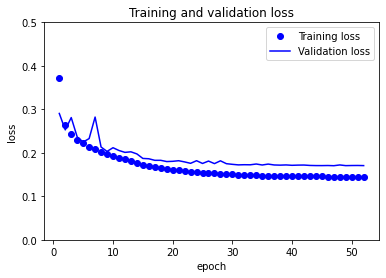

In [0]:
plotting_training(lstm_history)

In [0]:
# test 
# for lstm
x_test = []
y_test = []

for record in train_data:
  x_test.append(record[1:])
  label = int(record[0])
  y_test.append(label) 

x_test = array(x_test)
x_test = x_test.reshape((len(x_test), 1, len(x_test[0])))

y_test = array(y_test)

test_score = lstm_model.evaluate(x_test, y_test)
print(test_score)

1148/1148 [==============================] - 7s 6ms/step - loss: 0.1497 - acc: 0.9395 - auc_4: 0.9805 - false_negatives_7: 49462.9883 - recall_4: 0.9486 - precision_4: 0.9125 - false_negatives_8: 49462.9883 - true_negatives_4: 878713.0625 - false_positives_4: 87488.1562 - true_positives_4: 912731.1875
[0.14972610771656036, 0.9394516944885254, 0.9805395603179932, 49462.98828125, 0.9485976696014404, 0.9125279188156128, 49462.98828125, 878713.0625, 87488.15625, 912731.1875]


In [0]:
# solution 2: train model using CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))

x_train = []
y_train = []

for record in train_data:
  x_train.append(record[1:])
  label = int(record[0])
  y_train.append(label) 

def train_cnn_model(x_train, y_train):
  x_train = array(x_train)
  x_train = x_train.reshape((len(x_train), 3, int(len(x_train[0])/3), 1))

  y_train = array(y_train)

  #create model
  cnn_model = Sequential()
  cnn_model.add(Conv2D(64, 
                  kernel_size=3, 
                  activation='relu', 
                  input_shape=(3,21,1), 
                  padding='same'))
  cnn_model.add(layers.BatchNormalization(1))
  cnn_model.add(Conv2D(64, 
                  kernel_size=3, 
                  activation='relu', 
                  padding='same'))
  cnn_model.add(layers.BatchNormalization(1))
  cnn_model.add(MaxPooling2D(2,2))
  cnn_model.add(Flatten())
  cnn_model.add(Dense(512, activation = 'relu')) 
  cnn_model.add(Dense(1, activation='sigmoid'))

  # compile and fit
  cnn_model.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics=['acc', 
                        metrics.AUC(), 
                        metrics.FalseNegatives(),
                        metrics.Recall(),
                        metrics.Precision(),
                        metrics.FalseNegatives(),
                        metrics.TrueNegatives(),
                        metrics.FalsePositives(),
                        metrics.TruePositives()])
  cnn_history = cnn_model.fit(x_train, y_train,
                      epochs=100,
                      batch_size=16,
                      validation_split=0.2,
                      callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=5),
                      callbacks.LearningRateScheduler(scheduler)])
    
  print("finish training cnn model")
  return cnn_model, cnn_history


cnn_model, cnn_history = tain_cnn_model(x_train, y_train)

Epoch 1/100
1837/1837 [==============================] - 17s 9ms/step - loss: 0.2590 - acc: 0.8909 - auc_5: 0.9174 - false_negatives_9: 820.3588 - recall_5: 0.8584 - precision_5: 0.8328 - false_negatives_10: 820.3588 - true_negatives_5: 6296.3540 - false_positives_5: 1063.7083 - true_positives_5: 6523.5747 - val_loss: 0.1857 - val_acc: 0.9257 - val_auc_5: 0.9616 - val_false_negatives_9: 1475.2848 - val_recall_5: 0.9104 - val_precision_5: 0.8828 - val_false_negatives_10: 1475.2848 - val_true_negatives_5: 14592.5957 - val_false_positives_5: 1989.9500 - val_true_positives_5: 15014.1416 - lr: 0.0010
Epoch 2/100
1837/1837 [==============================] - 16s 9ms/step - loss: 0.1693 - acc: 0.9295 - auc_5: 0.9688 - false_negatives_9: 2017.8922 - recall_5: 0.9208 - precision_5: 0.8945 - false_negatives_10: 2017.8922 - true_negatives_5: 23007.4902 - false_positives_5: 2768.3037 - true_positives_5: 23641.2949 - val_loss: 0.1963 - val_acc: 0.9137 - val_auc_5: 0.9724 - val_false_negatives_9: 251

In [0]:
cnn_model.summary()
cnn_model.save("/content/drive/My Drive/636project/model_improved_cnn.h5")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 21, 64)         640       
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 21, 64)         12        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 21, 64)         36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 3, 21, 64)         12        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 10, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

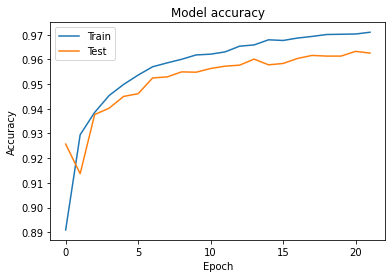

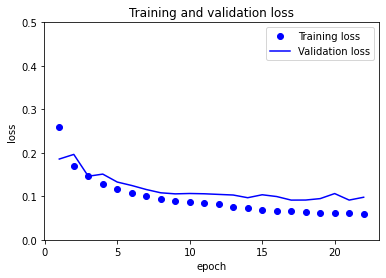

In [0]:
plotting_training(cnn_history)

In [0]:
# test
# for cnn 2d
x_test = []
y_test = []

for record in train_data:
  x_test.append(record[1:])
  label = int(record[0])
  y_test.append(label) 

x_test = array(x_test)
x_test = x_test.reshape((len(x_test), 3, int(len(x_test[0])/3), 1))

y_test = array(y_test)

test_score = cnn_model.evaluate(x_test, y_test)
print(test_score)

1148/1148 [==============================] - 7s 6ms/step - loss: 0.0667 - acc: 0.9692 - auc_5: 0.9928 - false_negatives_9: 8458.3076 - recall_5: 0.9795 - precision_5: 0.9361 - false_negatives_10: 8458.3076 - true_negatives_5: 386510.8750 - false_positives_5: 27570.6680 - true_positives_5: 403926.0625
[0.0666593685746193, 0.9692357778549194, 0.9928162693977356, 8458.3076171875, 0.9794872999191284, 0.9361050128936768, 8458.3076171875, 386510.875, 27570.66796875, 403926.0625]


In [0]:
# train the final lstm model with all data (include test data) 

x_train_final = []
y_train_final = []

for record in all_data:
  x_train_final.append(record[1:])
  label = int(record[0])
  y_train_final.append(label) 

final_lstm_model, final_lstm_history = train_lstm_model(x_train_final, y_train_final)

final_lstm_model.save("/content/drive/My Drive/636project/final_lstm_model.h5")


x_train.shape (41322, 1, 63)
[[0.         0.         0.         0.65960469 0.11701667 0.801425
  0.68414844 0.12653854 0.794768   0.69841875 0.18652937 0.689862
  0.69842187 0.23430833 0.781249   0.63605312 0.10881875 0.749531
  0.62787812 0.17014771 0.816239   0.61864375 0.223425   0.877023
  0.66776875 0.23289583 0.624482   0.68313438 0.23288542 0.612742
  0.67391406 0.31340625 0.764745   0.66778281 0.39387917 0.748765
  0.65241562 0.2329     0.573559   0.65140937 0.31749375 0.752944
  0.6534625  0.40479792 0.707101   0.63095625 0.41298125 0.712712
  0.635075   0.41838542 0.76013    0.65961875 0.41159167 0.748788
  0.66264687 0.38158958 0.0546427  0.         0.         0.
  0.67083437 0.40072292 0.678566  ]]
y_train.shape (41322,)
Epoch 1/100
2067/2067 [==============================] - 25s 12ms/step - loss: 0.3562 - acc: 0.8425 - auc_6: 0.8651 - false_negatives_11: 1501.9308 - recall_6: 0.7501 - precision_6: 0.7923 - false_negatives_12: 1501.9308 - true_negatives_6: 6776.6035 - fals

In [0]:
# train the final cnn model with all data (include test data) 
x_train_final = []
y_train_final = []

for record in all_data:
  x_train_final.append(record[1:])
  label = int(record[0])
  y_train_final.append(label) 

final_cnn_model, final_cnn_history = train_cnn_model(x_train_final, y_train_final)

final_cnn_model.save("/content/drive/My Drive/636project/final_cnn_model.h5")


Epoch 1/100
2067/2067 [==============================] - 19s 9ms/step - loss: 0.2442 - acc: 0.8977 - auc_7: 0.9355 - false_negatives_13: 865.3019 - recall_7: 0.8725 - precision_7: 0.8491 - false_negatives_14: 865.3019 - true_negatives_7: 7240.1792 - false_positives_7: 1093.9860 - true_positives_7: 7344.5259 - val_loss: 0.1723 - val_acc: 0.9267 - val_auc_7: 0.9658 - val_false_negatives_13: 1567.0813 - val_recall_7: 0.9156 - val_precision_7: 0.8896 - val_false_negatives_14: 1567.0813 - val_true_negatives_7: 16496.4824 - val_false_positives_7: 2110.1257 - val_true_positives_7: 17027.2988 - lr: 0.0010
Epoch 2/100
2067/2067 [==============================] - 19s 9ms/step - loss: 0.1672 - acc: 0.9308 - auc_7: 0.9715 - false_negatives_13: 2150.0232 - recall_7: 0.9250 - precision_7: 0.8982 - false_negatives_14: 2150.0232 - true_negatives_7: 25930.1797 - false_positives_7: 3016.7234 - true_positives_7: 26769.0566 - val_loss: 0.1496 - val_acc: 0.9362 - val_auc_7: 0.9751 - val_false_negatives_13: